In [1]:


import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler






#[dataset['AirTemp'].iloc[0:8700]]

In [2]:
dataset=pd.read_csv('https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv')


In [3]:
set_entrenamiento1= (dataset["Ghi"].iloc[0:8700])
set_validacion1 = dataset["Ghi"].iloc[8700:10000]

In [4]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento=set_entrenamiento1.values.reshape(-1,1)
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

In [5]:
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import GRU, Dense

In [8]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

In [9]:
modelo = Sequential()

In [10]:
modelo.add(GRU(units=na, input_shape=dim_entrada))

In [11]:
modelo.add(Dense(units=dim_salida))

In [12]:
from keras.callbacks import learning_rate_schedule
modelo.compile(optimizer="adam", loss='mse')

In [13]:
modelo.fit(X_train,Y_train,epochs=20,batch_size=32,verbose=1)


Epoch 1/20
270/270 [==============================] - 14s 38ms/step - loss: 0.0072
Epoch 2/20
270/270 [==============================] - 7s 25ms/step - loss: 0.0013
Epoch 3/20
270/270 [==============================] - 5s 19ms/step - loss: 9.1150e-04
Epoch 4/20
270/270 [==============================] - 5s 20ms/step - loss: 7.3420e-04
Epoch 5/20
270/270 [==============================] - 5s 20ms/step - loss: 6.2566e-04
Epoch 6/20
270/270 [==============================] - 5s 18ms/step - loss: 5.2734e-04
Epoch 7/20
270/270 [==============================] - 5s 19ms/step - loss: 4.3679e-04
Epoch 8/20
270/270 [==============================] - 5s 19ms/step - loss: 3.6912e-04
Epoch 9/20
270/270 [==============================] - 5s 20ms/step - loss: 3.1980e-04
Epoch 10/20
270/270 [==============================] - 5s 19ms/step - loss: 2.8582e-04
Epoch 11/20
270/270 [==============================] - 5s 18ms/step - loss: 2.4904e-04
Epoch 12/20
270/270 [==============================] - 5s 1

In [14]:
x_test = set_validacion1.values
x_test=x_test.reshape(-1,1)
x_test = sc.transform(x_test)

In [15]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [16]:
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)
prediccion2=pd.DataFrame(prediccion)


In [17]:
prediccion2


,0
0,-1.303860
1,-1.303860
2,-1.303860
3,-1.303860
4,-1.303860
...,...
1235,877.816040
1236,875.416138
1237,772.954590
1238,736.125000


In [18]:
xaxis=np.arange(start=0,stop=43500,step=5)



In [19]:
url='https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv'
df=pd.read_csv(url)
datos_train=df["Ghi"].iloc[0:8700]
datos_val=df["Ghi"].iloc[8700:10000]

datos_val


8700      0
8701      0
8702      0
8703      0
8704      0
       ... 
9995    891
9996    852
9997    779
9998    772
9999    809
Name: Ghi, Length: 1300, dtype: int64

In [20]:
from numpy.matrixlib.defmatrix import concatenate

j=np.zeros(8755,int)
pred44=pd.DataFrame(j)
pred56=np.asarray(prediccion2,dtype=np.float64)

pred56=pred56.reshape(-1,1)
pred57=j.reshape(-1,1)
pred56





array([[ -1.30385983],
       [ -1.30385983],
       [ -1.30385983],
       ...,
       [772.95458984],
       [736.125     ],
       [798.00463867]])

In [21]:
lim=np.concatenate((pred57,pred56))
lim
lim2=pd.DataFrame(lim)
prediccion_final=lim2[8700:]

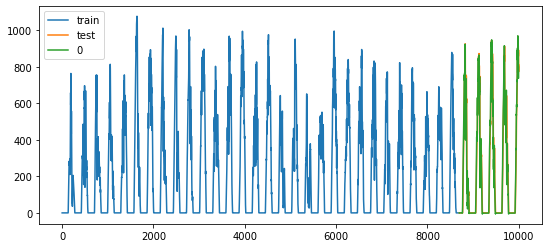

In [22]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
prediccion_final.plot(ax=ax,label="predict2")

ax.legend();

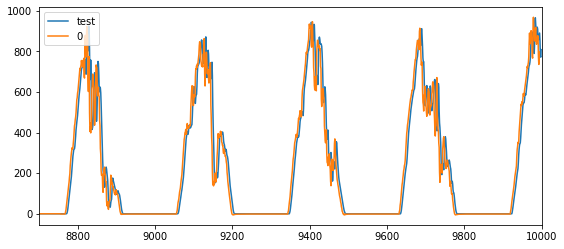

In [23]:
fig, ax = plt.subplots(figsize=(9, 4))
#datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
lim2.plot(ax=ax, label='predict')
plt.xlim(8700,10000)
ax.legend();



